In [351]:
 #Importing libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [352]:
#Importing Sequential, Dense, SimpleRNN from tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [353]:
#Import TimeseriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#Import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [354]:
#Create the sine-wave using Numpy

x = np.linspace(0,94,750)
y = np.sin(x)

In [355]:
# Print value of x

x

array([ 0.        ,  0.12550067,  0.25100134,  0.376502  ,  0.50200267,
        0.62750334,  0.75300401,  0.87850467,  1.00400534,  1.12950601,
        1.25500668,  1.38050734,  1.50600801,  1.63150868,  1.75700935,
        1.88251001,  2.00801068,  2.13351135,  2.25901202,  2.38451268,
        2.51001335,  2.63551402,  2.76101469,  2.88651535,  3.01201602,
        3.13751669,  3.26301736,  3.38851802,  3.51401869,  3.63951936,
        3.76502003,  3.89052069,  4.01602136,  4.14152203,  4.2670227 ,
        4.39252336,  4.51802403,  4.6435247 ,  4.76902537,  4.89452603,
        5.0200267 ,  5.14552737,  5.27102804,  5.3965287 ,  5.52202937,
        5.64753004,  5.77303071,  5.89853138,  6.02403204,  6.14953271,
        6.27503338,  6.40053405,  6.52603471,  6.65153538,  6.77703605,
        6.90253672,  7.02803738,  7.15353805,  7.27903872,  7.40453939,
        7.53004005,  7.65554072,  7.78104139,  7.90654206,  8.03204272,
        8.15754339,  8.28304406,  8.40854473,  8.53404539,  8.65

In [356]:
# Print value of y
y

array([ 0.        ,  0.12517148,  0.24837404,  0.36766974,  0.48118208,
        0.58712555,  0.68383368,  0.76978527,  0.84362832,  0.90420131,
        0.95055144,  0.98194962,  0.99790197,  0.99815757,  0.9827124 ,
        0.9518094 ,  0.90593467,  0.84580981,  0.77238057,  0.68680197,
        0.59042014,  0.48475115,  0.37145715,  0.25232021,  0.12921434,
        0.00407595, -0.12112654, -0.24442375, -0.36387623, -0.47760502,
       -0.58382121, -0.68085403, -0.76717718, -0.84143282, -0.90245294,
       -0.94927768, -0.98117052, -0.99762979, -0.99839659, -0.98345885,
       -0.95305155, -0.90765297, -0.84797724, -0.77496303, -0.68975885,
       -0.59370492, -0.48831217, -0.37523838, -0.25626218, -0.13325505,
       -0.00815184,  0.11707959,  0.24046939,  0.36007667,  0.47402003,
        0.58050716,  0.67786307,  0.76455635,  0.83922335,  0.90068957,
        0.94798816,  0.98037513,  0.99734104,  0.99861902,  0.98418897,
        0.95427786,  0.9093562 ,  0.85013058,  0.77753263,  0.69

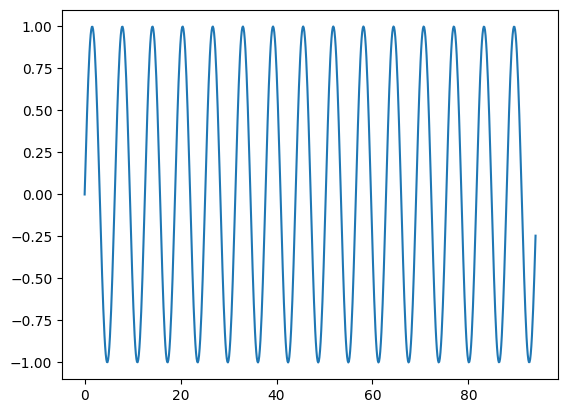

In [357]:
#Draw plot using x and y values

plt.plot(x, y)

In [358]:
#Index: x; Data: y; column label: Sine

df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [359]:
#Print the first five rows of the data frame

df.head(5)

,Sine
0.000000,0.000000
0.125501,0.125171
0.251001,0.248374
0.376502,0.367670
0.502003,0.481182


In [360]:
#Print the length of the dataframe

len(df)

750

<h3>Split Data --> Train/Test (Test 20% and Training 80%)</h3>

In [361]:
#Testing data is 20%

test_percent = 0.2

In [362]:
#Check the number of data points reserved for testing

len(df)*test_percent

150.0

In [363]:
#Round the test dataset to the nearest decimal

test_length = np.round(len(df)*test_percent)

In [364]:
#Print rounded value of the test data

test_length

150.0

In [365]:
#Index starts with 0

test_start_index = int(len(df) - test_length)

In [366]:
#Print test start index

test_start_index

600

In [367]:
#Create separate training/testing datasets

data_train = df.iloc[: test_start_index]

data_test = df.iloc[test_start_index :]

In [368]:
#Print train data first five rows

data_train.head(5)

,Sine
0.000000,0.000000
0.125501,0.125171
0.251001,0.248374
0.376502,0.367670
0.502003,0.481182


In [369]:
#Print test first five rows

data_test.head(5)

,Sine
75.300401,-0.097667
75.425901,0.027674
75.551402,0.152580
75.676903,0.275086
75.802403,0.393265


<h3>Normalize Data (Scale it into the range [0, 1])</h3>

In [370]:
#Create a MinMaxScaler to normalize the data, rante is 0 and 1

scaler = MinMaxScaler()

In [371]:
#Scaling the train data, Train the scaler to perform the normalization

scaler.fit(data_train)

MinMaxScaler()

In [372]:
#Normalize the training dataset

normalized_train = scaler.transform(data_train)

#Normalize the testing dataset

normalized_test = scaler.transform(data_test)

<h3>Create TimeseriesGenerator instance</h3>

In [373]:
#TimeseriesGenerator: Generate time series batches for training/testing

#set the length of the input sequence
#i.e., the number of time series steps that are used to predict the future one
#Use 94 historical data points to predict the subsequent one

length = 94

#batch size: Number of time series samples in each batch
#One sample: each sample is a time series input sequence
#Only one sample in each batch

batch_size = 1

#Create a TimeSeriesGenerator for training: train_tsGenerator, this will produce time series batches used to train the model
#TimeSeriesGenerator (inputs dataset, outputs dataset, length, batch_size)

train_tsGenerator94 = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

In [374]:
#Here is the First batch

X,y = train_tsGenerator94[0]

In [375]:
#Print X.flatten

X.flatten()

array([5.00001641e-01, 5.62587592e-01, 6.24189081e-01, 6.83837132e-01,
       7.40593495e-01, 7.93565408e-01, 8.41919634e-01, 8.84895574e-01,
       9.21817227e-01, 9.52103823e-01, 9.75278963e-01, 9.90978107e-01,
       9.98954311e-01, 9.99082111e-01, 9.91359498e-01, 9.75907946e-01,
       9.52970504e-01, 9.22907972e-01, 8.86193228e-01, 8.43403784e-01,
       7.95212709e-01, 7.42378035e-01, 6.85730841e-01, 6.26162171e-01,
       5.64609027e-01, 5.02039625e-01, 4.39438166e-01, 3.77789355e-01,
       3.18062914e-01, 2.61198324e-01, 2.08090053e-01, 1.59573479e-01,
       1.16411757e-01, 7.92838098e-02, 4.87736513e-02, 2.53611988e-02,
       9.41472442e-03, 1.18506223e-03, 8.01662838e-04, 8.27055702e-03,
       2.34742609e-02, 4.61736239e-02, 7.60115907e-02, 1.12518817e-01,
       1.55121054e-01, 2.03148178e-01, 2.55844734e-01, 3.12381819e-01,
       3.71870118e-01, 4.33373894e-01, 4.95925708e-01, 5.58541636e-01,
       6.20236744e-01, 6.80040583e-01, 7.37012454e-01, 7.90256203e-01,
      

In [376]:
#Print y: What does X predict

y

array([[0.15218138]])

<h3>Build, Train, and Test Model</h3></n><h3>Build SimpleRNN Model</h3>

In [377]:
#Data set: Only one column/attribute: Sine values of index x
#Features: How many features used to train the model: only one

n_features = 1

#define the model

model = Sequential()

#Add a simple RNN layer: Using SimpleRNN cells
#This layer has 94neurons: One neuron for each input data point

model.add(SimpleRNN(94, input_shape=(length, n_features)))

#Add a fully-connected (FC) layer for the final prediction
#Only one neuron of the Dense/Fully-connected layer
#Output: Predict the next data point of the input sequence: only one value

model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<h3>Compile Model</h3>

In [378]:
#Compile the model
#Optimizer: Adam
#Loss function: mse (Mean Squared Errors)-As it is a regression problem we are using MSE

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)             │ (None, 94)                  │           9,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              95 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,119 (35.62 KB)

 Trainable params: 9,119 (35.62 KB)

 Non-trainable params: 0 (0.00 B)

<h3>Train (fit) Model</h3>

In [379]:
#Fit the model
#Use fit_generator(), Not fit()

model.fit(train_tsGenerator94,epochs=15)

Epoch 1/15
 15/506 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3142

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0274
Epoch 2/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 5.7257e-05
Epoch 3/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 1.6205e-04
Epoch 4/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0139
Epoch 5/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0094
Epoch 6/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0019
Epoch 7/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 4.9177e-04
Epoch 8/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 3.6837e-04
Epoch 9/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 2.7981e-04
Epoch 10/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 1.9833e-04
Epoch 11/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0017
Epoch 12/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 2.8396e-04
Epoch 13/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 3.5305e-04
Epoch 14/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 4.9416e-04
Epoch 15/15
506

<h3>Visualize Model's Performance after Training</h3>

<Axes: >

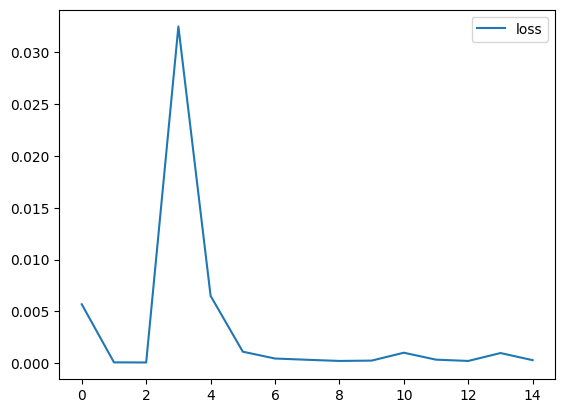

In [380]:
#Load the loss data into a data frame

df_model_loss = pd.DataFrame(model.history.history)

#Visualize the loss data

df_model_loss.plot()

<h3>Evaluate Model on Test Data</h3>

In [381]:
#Number of time steps of the input time series

length

94

In [382]:
#Take a sneak peek into the 1st time series batch (94 data points)

first_eval_batch = normalized_train[-length : ]
first_eval_batch

array([[8.11077217e-01],
       [8.57629112e-01],
       [8.98555615e-01],
       [9.33212961e-01],
       [9.61055999e-01],
       [9.81646765e-01],
       [9.94661371e-01],
       [9.99895100e-01],
       [9.97265627e-01],
       [9.86814314e-01],
       [9.68705556e-01],
       [9.43224200e-01],
       [9.10771062e-01],
       [8.71856621e-01],
       [8.27092993e-01],
       [7.77184297e-01],
       [7.22915586e-01],
       [6.65140493e-01],
       [6.04767807e-01],
       [5.42747174e-01],
       [4.80054165e-01],
       [4.17674924e-01],
       [3.56590663e-01],
       [2.97762221e-01],
       [2.42114956e-01],
       [1.90524185e-01],
       [1.43801419e-01],
       [1.02681595e-01],
       [6.78115191e-02],
       [3.97396876e-02],
       [1.89076641e-02],
       [5.64313114e-03],
       [1.54736689e-04],
       [2.52881181e-03],
       [1.27280129e-02],
       [3.05919089e-02],
       [5.58395053e-02],
       [8.80736634e-02],
       [1.26787348e-01],
       [1.71371602e-01],


In [383]:
#Reshape the first_eval_batch  to a 3D array

first_eval_batch = first_eval_batch.reshape((1, length, n_features))
first_eval_batch

array([[[8.11077217e-01],
        [8.57629112e-01],
        [8.98555615e-01],
        [9.33212961e-01],
        [9.61055999e-01],
        [9.81646765e-01],
        [9.94661371e-01],
        [9.99895100e-01],
        [9.97265627e-01],
        [9.86814314e-01],
        [9.68705556e-01],
        [9.43224200e-01],
        [9.10771062e-01],
        [8.71856621e-01],
        [8.27092993e-01],
        [7.77184297e-01],
        [7.22915586e-01],
        [6.65140493e-01],
        [6.04767807e-01],
        [5.42747174e-01],
        [4.80054165e-01],
        [4.17674924e-01],
        [3.56590663e-01],
        [2.97762221e-01],
        [2.42114956e-01],
        [1.90524185e-01],
        [1.43801419e-01],
        [1.02681595e-01],
        [6.78115191e-02],
        [3.97396876e-02],
        [1.89076641e-02],
        [5.64313114e-03],
        [1.54736689e-04],
        [2.52881181e-03],
        [1.27280129e-02],
        [3.05919089e-02],
        [5.58395053e-02],
        [8.80736634e-02],
        [1.2

In [384]:
first_eval_batch.shape

(1, 94, 1)

<h3>Evaluate Model</h3>

In [385]:
#Declare a list to store all the predictions

test_predictions = []

#Get the first time series batch for testing

first_eval_batch = normalized_train[-length: ]

#Reshape the batch into 3D array: #samples/batch x length x #features

current_batch = first_eval_batch.reshape((1, length, n_features))

#Run a FOR LOOP to make a prediction for each batch

for i in range(len(data_test)):

    #Get the value of the first element: The prediction
    current_pred = model.predict(current_batch)[0]

    #store prediction into the list of prediction
    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

In [386]:
#Convert the scaled result back to the real values

true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[-0.11045336],
       [ 0.00529937],
       [ 0.1152878 ],
       [ 0.218496  ],
       [ 0.31285365],
       [ 0.39723792],
       [ 0.47029831],
       [ 0.53110056],
       [ 0.57913447],
       [ 0.61402441],
       [ 0.63587063],
       [ 0.64496353],
       [ 0.64181772],
       [ 0.62715634],
       [ 0.60175996],
       [ 0.5665062 ],
       [ 0.52228161],
       [ 0.46996572],
       [ 0.41043184],
       [ 0.34452101],
       [ 0.27306267],
       [ 0.19687973],
       [ 0.11680188],
       [ 0.03368729],
       [-0.0515644 ],
       [-0.13799484],
       [-0.22457775],
       [-0.31021521],
       [-0.39374219],
       [-0.47394176],
       [-0.54956606],
       [-0.61937329],
       [-0.73739075],
       [-0.82773854],
       [-0.8808057 ],
       [-0.95352218],
       [-1.01055527],
       [-1.05228429],
       [-1.07790342],
       [-1.08763178],
       [-1.08113839],
       [-1.05926856],
       [-1.02274899],
       [-0.9725927 ],
       [-0.91027645],
       [-0

In [387]:
data_test

,Sine
75.300401,-0.097667
75.425901,0.027674
75.551402,0.152580
75.676903,0.275086
75.802403,0.393265
...,...
93.497997,-0.681479
93.623498,-0.584515
93.748999,-0.478355
93.874499,-0.364672


In [388]:
#Copy the true values of predictions into the data frame of original test data

data_test['Predictions'] = true_predictions

<ipython-input-388-187f7990f634>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


In [389]:
#Update data test

data_test

,Sine,Predictions
75.300401,-0.097667,-0.110453
75.425901,0.027674,0.005299
75.551402,0.152580,0.115288
75.676903,0.275086,0.218496
75.802403,0.393265,0.312854
...,...,...
93.497997,-0.681479,-1.458635
93.623498,-0.584515,-1.338523
93.748999,-0.478355,-1.200967
93.874499,-0.364672,-1.049220


<Axes: >

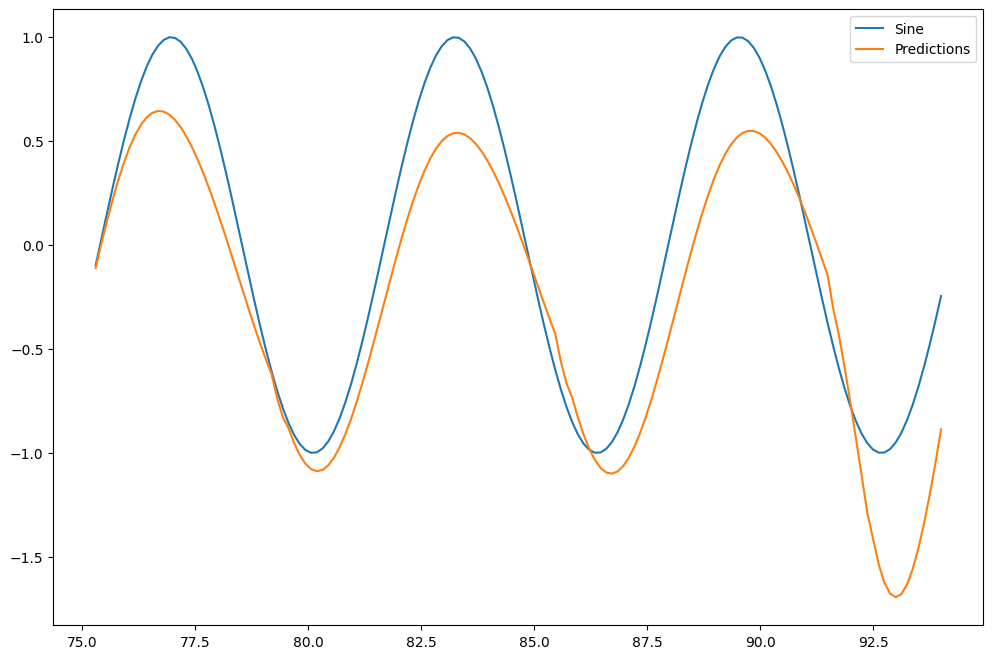

In [390]:
#Visualize the data of the updated test data
#Compare the predicted sine wave against the original sine wave, each of them represented with a different color

data_test.plot(figsize=(12,8))